In [1]:
import numpy as np
import cv2
import os

In [2]:
# Create directories to store images
os.makedirs("dataset/thumbs_up", exist_ok=True)
os.makedirs("dataset/peace_sign", exist_ok=True)
os.makedirs("dataset/fist", exist_ok=True)

In [3]:
# Generate and save images for each gesture
def generate_and_save_gesture(gesture_name, num_images):
    for i in range(num_images):
        # Generate a random synthetic image for the gesture
        image = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)
        # Save the image
        cv2.imwrite(f"dataset/{gesture_name}/image_{i}.jpg", image)

In [4]:
# Number of images per gesture
num_images_per_gesture = 100

In [5]:
# Generate images for each gesture
generate_and_save_gesture("thumbs_up", num_images_per_gesture)
generate_and_save_gesture("peace_sign", num_images_per_gesture)
generate_and_save_gesture("fist", num_images_per_gesture)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'dataset/',
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

Found 300 images belonging to 3 classes.


In [8]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

Epoch 1/10
10/10 [==============================] - 7s 540ms/step - loss: 1.1686 - accuracy: 0.3500
Epoch 2/10
10/10 [==============================] - 4s 393ms/step - loss: 1.0997 - accuracy: 0.3567
Epoch 3/10
10/10 [==============================] - 4s 397ms/step - loss: 1.0984 - accuracy: 0.3367
Epoch 4/10
10/10 [==============================] - 5s 437ms/step - loss: 1.0954 - accuracy: 0.4667
Epoch 5/10
10/10 [==============================] - 4s 434ms/step - loss: 1.0915 - accuracy: 0.4167
Epoch 6/10
10/10 [==============================] - 5s 580ms/step - loss: 1.0876 - accuracy: 0.3533
Epoch 7/10
10/10 [==============================] - 4s 414ms/step - loss: 1.0791 - accuracy: 0.4267
Epoch 8/10
10/10 [==============================] - 6s 559ms/step - loss: 1.0682 - accuracy: 0.4300
Epoch 9/10
10/10 [==============================] - 4s 400ms/step - loss: 1.0454 - accuracy: 0.4167
Epoch 10/10
10/10 [==============================] - 4s 414ms/step - loss: 1.0165 - accuracy: 0.6267

In [11]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'dataset/',
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Found 300 images belonging to 3 classes.
10/10 [==============================] - 2s 127ms/step - loss: 1.0019 - accuracy: 0.6500
Test Loss: 1.0018547773361206
Test Accuracy: 0.6499999761581421


In [12]:
# Predictions
class_names = ['fist', 'peace_sign', 'thumbs_up']

# Function to predict a single image
def predict_single_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

In [13]:
# Test prediction on a single image
test_image_path = 'dataset/thumbs_up/image_0.jpg'
predicted_class = predict_single_image(test_image_path)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 474ms/step
Predicted Class: peace_sign


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

Epoch 1/10
10/10 [==============================] - 6s 614ms/step - loss: 0.9912 - accuracy: 0.6333 - val_loss: 0.9790 - val_accuracy: 0.3333
Epoch 2/10
10/10 [==============================] - 7s 701ms/step - loss: 0.9444 - accuracy: 0.5600 - val_loss: 0.8679 - val_accuracy: 0.9667
Epoch 3/10
10/10 [==============================] - 5s 550ms/step - loss: 0.8506 - accuracy: 0.8067 - val_loss: 0.7670 - val_accuracy: 0.8900
Epoch 4/10
10/10 [==============================] - 7s 741ms/step - loss: 0.7224 - accuracy: 0.8167 - val_loss: 0.6273 - val_accuracy: 0.9133
Epoch 5/10
10/10 [==============================] - 5s 545ms/step - loss: 0.5589 - accuracy: 0.8967 - val_loss: 0.4310 - val_accuracy: 0.9933
Epoch 6/10
10/10 [==============================] - 8s 855ms/step - loss: 0.4422 - accuracy: 0.9233 - val_loss: 0.3417 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 5s 548ms/step - loss: 0.2986 - accuracy: 0.9833 - val_loss: 0.2110 - val_accuracy: 0.9867
Epoch 

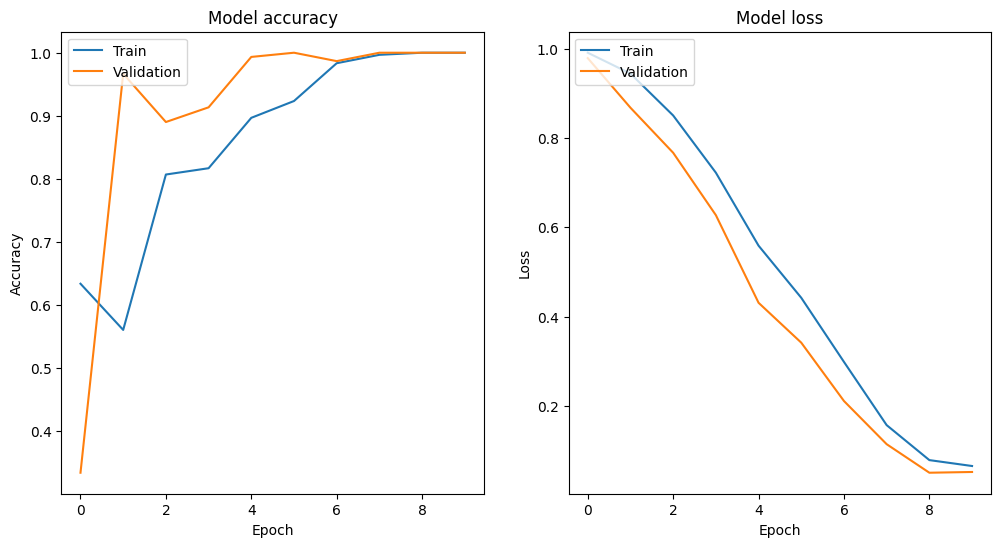

In [16]:
# Train the model and collect history
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Plot training history
plot_training_history(history)

In [17]:
# Predictions for confusion matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=-1)

10/10 [==============================] - 1s 124ms/step


<Figure size 800x600 with 0 Axes>

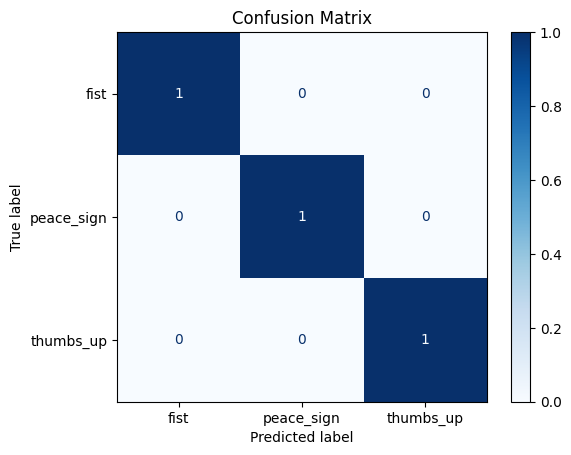

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()